In [1]:
import pandas as pd
import numpy as np
import random
import math
from tqdm import tqdm

In [2]:
data = pd.read_csv('../data/an/anneal_train.csv')
feature_columns = [ col for col in data.columns if col not in ['id','target']]
data['f33'] = data['f33'].astype(int)
data['f34'] = data['f34'].astype(int)
data['f35'] = data['f35'].astype(int)
# for col in feature_columns:
#     data[col] = pd.qcut(data[col], q=5, labels=False, duplicates='drop')
print(data[feature_columns].nunique())
# encode labels column to numbers
# y = data['outcome']

f1      3
f2      1
f3      8
f4     10
f5      7
f6      2
f7      3
f8      5
f9      8
f10     2
f11     2
f12     5
f13     3
f14     2
f15     2
f16     2
f17     3
f18     2
f19     1
f20     2
f21     2
f22     2
f23     1
f24     2
f25     2
f26     1
f27     4
f28     2
f29     1
f30     1
f31     1
f32     2
f33     5
f34    58
f35    24
f36     3
f37     3
f38     3
dtype: int64


In [3]:
print(feature_columns)

['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38']


In [4]:
def calculate_equivalence_classes(data, condition_attrs):
    # 取出条件属性的列索引
    # 设置条件属性为索引
    # print(condition_attrs)
    data_indexed = data.set_index(condition_attrs)
    # 按照索引分组并将分组内结果合并为列表
    equivalence_classes = data_indexed.groupby(level=condition_attrs)[data.columns[0]].apply(list).to_dict()
    return equivalence_classes

In [5]:
def fitness_function(feature_columns,data,decision_attr):
    # 计算D的信息熵
    total_records = len(data)
    decision_counts = data[decision_attr].value_counts()
    decision_prob = decision_counts / total_records
    entropy_D = -(decision_prob * np.log2(decision_prob)).sum()

    equivalence_classes = calculate_equivalence_classes(data,feature_columns)
    equivalence_classes_dec = calculate_equivalence_classes(data, decision_attr)

    rule_confidences =0
    entropy_DB = 0
    count=0

    for equivalence_class in equivalence_classes.values():
           class_size = len(equivalence_class)
           max=0
           for key_decision in equivalence_classes_dec.keys():
               x=set(equivalence_class).intersection(equivalence_classes_dec.get(key_decision))
               if len(x) / class_size >max:
                   max=len(x)/class_size
           y=1-max
           rule_confidences=rule_confidences+y
           count=count+1

    for equivalence_class in equivalence_classes.values():
        class_size = len(equivalence_class)
        class_prob = class_size / total_records
        for key_decision in equivalence_classes_dec.keys():
            x=set(equivalence_class).intersection(equivalence_classes_dec.get(key_decision))
            if (len(x)>0):
                decision_prob = len(x) / class_size
                entropy_DB -= class_prob * decision_prob * math.log(decision_prob, 2)
    print(entropy_D-entropy_DB)
    avg_confidence = rule_confidences / count+0*(entropy_D-entropy_DB)
    return avg_confidence

In [6]:
feature_columns=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38']
feature_columns1=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34']
feature_columns2=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30']
feature_columns3=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26']
feature_columns4=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22']
feature_columns5=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18']
feature_columns6=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14']
feature_columns7=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10']
feature_columns8=['f1', 'f2', 'f3', 'f4', 'f5', 'f6']
feature_columns9=['f1', 'f2']
feature_columns10=['f1', 'f3', 'f5', 'f8', 'f12', 'f14', 'f16', 'f18', 'f20', 'f21', 'f23', 'f25', 'f26', 'f29', 'f31', 'f32', 'f36', 'f38']
print(fitness_function(feature_columns10,data,'target'))

1.1561315594265689
0.012388392857142856


In [7]:
#feature_columns

In [8]:
a=[0. , 0.1 ,0.2, 0.3, 0.4, 0.5 ,0.6 ,0.7 ,0.8, 0.9 ,1. ]
b=[]
x=0.13130470419484205
y=0.40908953764450984
for i in a:
    b.append(x + i * y)
print(b)

[0.13130470419484205, 0.17221365795929305, 0.21312261172374403, 0.254031565488195, 0.29494051925264597, 0.335849473017097, 0.3767584267815479, 0.41766738054599895, 0.45857633431045, 0.4994852880749009, 0.5403942418393519]


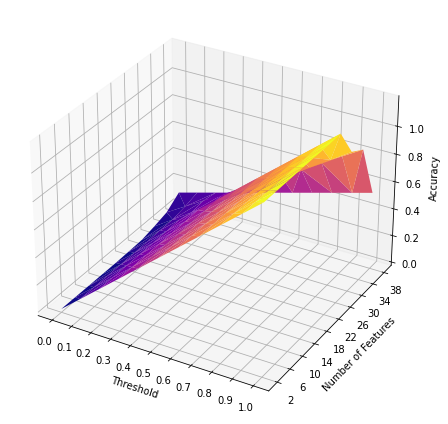

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Create data
x = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
y = [38, 34, 30, 26, 22, 18, 14, 10, 6, 2]
X, Y = np.meshgrid(x, y)
data=np.array([[0.13130470419484205, 0.17221365795929305, 0.21312261172374403, 0.254031565488195, 0.29494051925264597, 0.335849473017097, 0.3767584267815479, 0.41766738054599895, 0.45857633431045, 0.4994852880749009, 0.5403942418393519],
       [0.05779083932836959, 0.1450016659633564, 0.2322124925983432, 0.31942331923333, 0.4066341458683168, 0.4938449725033036, 0.5810557991382904, 0.6682666257732772, 0.755477452408264, 0.8426882790432508, 0.9298991056782376],
       [0.02970928327572904, 0.1257064861610977, 0.22170368904646637, 0.317700891931835, 0.41369809481720365, 0.5096952977025723, 0.605692500587941, 0.7016897034733096, 0.7976869063586783, 0.893684109244047, 0.9896813121294156],
       [0.007017543859649123, 0.12546031110901168, 0.24390307835837424, 0.3623458456077368, 0.4807886128570994, 0.5992313801064619, 0.7176741473558245, 0.836116914605187, 0.9545596818545496, 1.0730024491039123, 1.1914452163532747],
       [0.0030075187969924814, 0.12145028604635505, 0.2398930532957176, 0.3583358205450801, 0.4767785877944427, 0.5952213550438052, 0.7136641222931678, 0.8321068895425303, 0.950549656791893, 1.0689924240412556, 1.187435191290618],
       [0.0, 0.11898, 0.23796, 0.35694, 0.47592, 0.5949, 0.71388, 0.8328599999999999, 0.95184, 1.07082, 1.1898],
       [0.0, 0.11898, 0.23796, 0.35694, 0.47592, 0.5949, 0.71388, 0.8328599999999999, 0.95184, 1.07082, 1.1898],
       [0.0, 0.11898, 0.23796, 0.35694, 0.47592, 0.5949, 0.71388, 0.8328599999999999, 0.95184, 1.07082, 1.1898],
       [0.0, 0.11898, 0.23796, 0.35694, 0.47592, 0.5949, 0.71388, 0.8328599999999999, 0.95184, 1.07082, 1.1898],
       [0.0, 0.11898, 0.23796, 0.35694, 0.47592, 0.5949, 0.71388, 0.8328599999999999, 0.95184, 1.07082, 1.1898]])

fig = plt.figure(figsize=(6,6))  # Set the size of the figure in inches
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X.flatten(), Y.flatten(), data.flatten(), cmap='plasma')

# Set the axis labels
ax.set_xlabel('Threshold')
ax.set_ylabel('Number of Features')
ax.set_zlabel('Accuracy')

# Customize the tick labels
x_ticks = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
y_ticks = [2, 6, 10, 14, 18, 22, 26, 30, 34, 38]

ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

# Save the plot in IEEE format
plt.tight_layout()
plt.savefig('test2.png', bbox_inches='tight',dpi=300)

# Show the plot in the console
plt.show()
